Программа визуалиции графиков продаж бара Nelson Sauvin

In [1]:
import kagglehub
import shutil
import os
import tqdm as notebook_tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Скачиваем датасет в кеш
cache_path = kagglehub.dataset_download("podsyp/sales-in-craft-beer-bar")

# Укажите целевую рабочую директорию
target_directory = "./datasets"

# Создайте целевую директорию, если она не существует
os.makedirs(target_directory, exist_ok=True)

# Копируем файлы из кеша в рабочую директорию
shutil.copytree(cache_path, target_directory, dirs_exist_ok=True)

print(f"Датасет скопирован в рабочую директорию: {target_directory}")

Датасет скопирован в рабочую директорию: ./datasets


Чтение файлов датасетов, как датафреймов

In [2]:
import pandas as pd
df_pr = pd.read_csv("./datasets/Product_range.csv")
df_tr = pd.read_csv("./datasets/Transactions.csv")

Базовая информация по датафреймам

In [3]:
print(df_pr.info())
print(df_pr.describe())
df_pr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5314 entries, 0 to 5313
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_code       5314 non-null   int64  
 1   Vendor_code        4288 non-null   object 
 2   Name               5314 non-null   object 
 3   Retail_price       4878 non-null   float64
 4   Base_unit          4910 non-null   object 
 5   Country_of_Origin  4205 non-null   object 
 6   Size               4626 non-null   float64
 7   ABV                4622 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 332.3+ KB
None
       Product_code  Retail_price         Size          ABV
count   5314.000000   4878.000000  4626.000000  4622.000000
mean    2690.844750    637.839502     0.626917     7.074273
std     1543.217814    504.895006     0.953290     2.457970
min        2.000000      1.000000     0.150000     0.500000
25%     1357.250000    350.000000     0.33000

Product_code Vendor_code  \
0             5028         NaN   
1             4846         NaN   
2             1340         NaN   
3             4372         NaN   
4             4302         NaN   
...            ...         ...   
5309           868         NaN   
5310          1861         NaN   
5311          4724         NaN   
5312           822     Bakunin   
5313          1682         NaN   

                                                   Name  Retail_price  \
0                              1 Symbiotica Apple 0.375         300.0   
1       1 Symbiotica Hard Kombucha Renegade Aronia 0.33         200.0   
2                        1000 IBU Imperial IPA Barrel l         960.0   
3                                   18th Street Brewery           NaN   
4         18th Street Brewery Deal With The Devil 0.473         630.0   
...                                                 ...           ...   
5309                                   Spagetti Vestern         880.0   
5310                Stoun Imperial Rashn Stout Barrel l        1200.0   
5311                  Semjuel Adams Boston Lager Barrel         720.0   
5312                                Bakunin Urban Juice         600.0   
5313  Hazeljuteli Shoktabulous Barrel l temnoe fil't...         880.0   

     Base_unit Country_of_Origin   Size   ABV  
0       Pieces            Russia  0.375   4.5  
1       Pieces            Russia  0.330   3.0  
2       Liters               NaN  1.000   9.6  
3          NaN               USA    NaN   NaN  
4       Pieces               USA  0.473   8.5  
...        ...               ...    ...   ...  
5309    Liters               NaN  1.000   8.7  
5310    Liters               NaN  1.000  10.8  
5311    Liters               NaN  1.000   4.8  
5312    Liters            Russia  1.000   7.2  
5313    Liters               NaN  1.000   5.7  

[5314 rows x 8 columns]

In [4]:
print(df_tr.info())
print(df_tr.describe())
df_tr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50084 entries, 0 to 50083
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_and_time_of_unloading  50084 non-null  object 
 1   Product_code                50084 non-null  int64  
 2   Amount                      50084 non-null  float64
 3   Sale_amount                 50033 non-null  float64
 4   Discount_amount             39882 non-null  float64
 5   Profit                      50070 non-null  float64
 6   Percentage_markup           48145 non-null  float64
 7   Discount_percentage         39882 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.1+ MB
None
       Product_code        Amount   Sale_amount  Discount_amount  \
count  50084.000000  50084.000000  50033.000000     39882.000000   
mean    2153.160031      3.553146   1429.786677       243.761323   
std     1367.357705      5.485805   2419.585455    

Date_and_time_of_unloading  Product_code  Amount  Sale_amount  \
0            2020-01-01 23:00:00           144     1.0       280.00   
1            2020-01-01 23:00:00           209     2.0       545.73   
2            2020-01-01 23:00:00           213     2.0      1265.05   
3            2020-01-01 23:00:00           217     1.0       630.00   
4            2020-01-01 23:00:00           222     2.0      1104.75   
...                          ...           ...     ...          ...   
50079        2022-09-18 15:00:00          5316     6.0      1875.95   
50080        2022-09-18 15:00:00          5317     2.0       555.95   
50081        2022-09-18 15:00:00          5318     2.0       572.50   
50082        2022-09-18 15:00:00          5321     1.0       300.00   
50083        2022-09-18 15:00:00          5322     2.0       600.00   

       Discount_amount   Profit  Percentage_markup  Discount_percentage  
0                  NaN   155.00             124.00                  NaN  
1               294.27    75.73              16.11                35.03  
2                34.95   653.05             106.71                 2.69  
3                70.00   220.50              53.85                10.00  
4               195.25   393.75              55.38                15.02  
...                ...      ...                ...                  ...  
50079           104.05  1095.95             140.51                 5.26  
50080           104.05   315.95             131.65                15.77  
50081            87.50   312.50             120.19                13.26  
50082              NaN   180.00             150.00                  NaN  
50083              NaN   340.00             130.77                  NaN  

[50084 rows x 8 columns]

Объединение двух датафреймов по общей колонке 'Product_code'

In [5]:
merged_df = pd.merge(df_pr, df_tr, on='Product_code', how='left')
merged_df

Product_code Vendor_code  \
0              5028         NaN   
1              5028         NaN   
2              5028         NaN   
3              4846         NaN   
4              4846         NaN   
...             ...         ...   
51437          4724         NaN   
51438          4724         NaN   
51439          4724         NaN   
51440           822     Bakunin   
51441          1682         NaN   

                                                    Name  Retail_price  \
0                               1 Symbiotica Apple 0.375         300.0   
1                               1 Symbiotica Apple 0.375         300.0   
2                               1 Symbiotica Apple 0.375         300.0   
3        1 Symbiotica Hard Kombucha Renegade Aronia 0.33         200.0   
4        1 Symbiotica Hard Kombucha Renegade Aronia 0.33         200.0   
...                                                  ...           ...   
51437                  Semjuel Adams Boston Lager Barrel         720.0   
51438                  Semjuel Adams Boston Lager Barrel         720.0   
51439                  Semjuel Adams Boston Lager Barrel         720.0   
51440                                Bakunin Urban Juice         600.0   
51441  Hazeljuteli Shoktabulous Barrel l temnoe fil't...         880.0   

      Base_unit Country_of_Origin   Size  ABV Date_and_time_of_unloading  \
0        Pieces            Russia  0.375  4.5        2022-07-03 00:00:00   
1        Pieces            Russia  0.375  4.5        2022-07-09 13:00:00   
2        Pieces            Russia  0.375  4.5        2022-07-19 20:00:00   
3        Pieces            Russia  0.330  3.0        2022-03-20 17:00:00   
4        Pieces            Russia  0.330  3.0        2022-03-23 17:00:00   
...         ...               ...    ...  ...                        ...   
51437    Liters               NaN  1.000  4.8        2022-02-26 20:00:00   
51438    Liters               NaN  1.000  4.8        2022-03-02 17:00:00   
51439    Liters               NaN  1.000  4.8        2022-03-07 18:00:00   
51440    Liters            Russia  1.000  7.2                        NaN   
51441    Liters               NaN  1.000  5.7                        NaN   

       Amount  Sale_amount  Discount_amount   Profit  Percentage_markup  \
0        2.00       420.00           180.00   140.00              50.00   
1        4.00       960.00           240.00   400.00              71.43   
2        5.00      1440.00            60.00   740.00             105.71   
3        4.00       412.23           277.77    52.23              14.51   
4        2.00       360.00            40.00   180.00             100.00   
...       ...          ...              ...      ...                ...   
51437   10.25      7040.55           339.45  3637.55             106.89   
51438   13.25      8854.37           685.63  4455.37             101.28   
51439    1.00       664.91            55.09   332.91             100.27   
51440     NaN          NaN              NaN      NaN                NaN   
51441     NaN          NaN              NaN      NaN                NaN   

       Discount_percentage  
0                    30.00  
1                    20.00  
2                     4.00  
3                    40.26  
4                    10.00  
...                    ...  
51437                 4.60  
51438                 7.19  
51439                 7.65  
51440                  NaN  
51441                  NaN  

[51442 rows x 15 columns]

Вывод информации по количеству уникальных элементов в каждой колонке

In [48]:
merged_df.nunique()

Product_code                   5314
Vendor_code                     271
Name                           5193
Retail_price                    184
Base_unit                         4
Country_of_Origin                28
Size                             31
ABV                             151
Date_and_time_of_unloading      458
Amount                          617
Sale_amount                   22572
Discount_amount               17843
Profit                        27941
Percentage_markup             13925
Discount_percentage            3629
dtype: int64

Создание фильтрованной гистограммы по цене продажи российских напитков

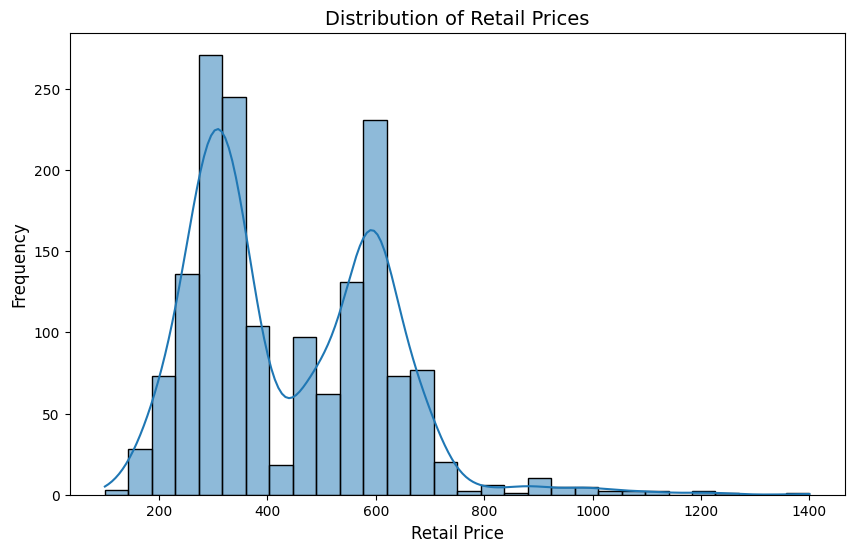

In [30]:
# Фильтрация по Vendor_code и Retail_price
filtered_df = df_pr[(df_pr['Country_of_Origin'] == 'Russia') & (df_pr['Retail_price'] < 2000)]

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df, x='Retail_price', kde=True, bins=30 )

# Настройка заголовков и меток
plt.title('Distribution of Retail Prices', fontsize=14)
plt.xlabel('Retail Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Построение boxplot соотношения прибыли и производителя, отфильтрованного по цене напитка и экспортированного из США

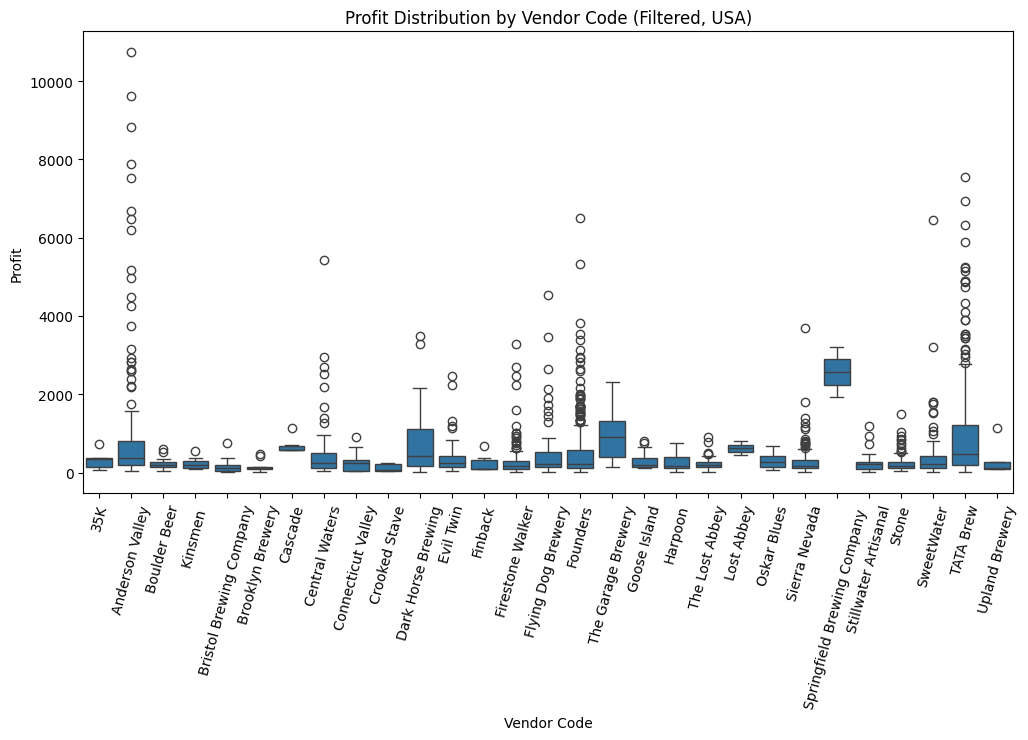

In [40]:
# Фильтрация данных: только Profit > 0
filtered_df = merged_df[(merged_df['Profit'] > 0) & (merged_df['Size'] > 0.3) & (merged_df['Country_of_Origin'] == 'USA')].head(3000)

# Boxplot для отфильтрованных данных
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Vendor_code', y='Profit')
plt.xticks(rotation=75)
plt.title('Profit Distribution by Vendor Code (Filtered, USA)')
plt.xlabel('Vendor Code')
plt.ylabel('Profit')
plt.show()

График соотношения прибыли к количеству проданного

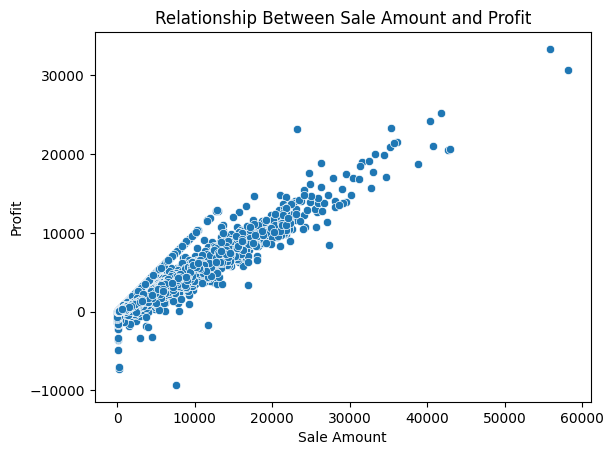

In [43]:
sns.scatterplot(data=merged_df, x='Sale_amount', y='Profit')
plt.title('Relationship Between Sale Amount and Profit')
plt.xlabel('Sale Amount')
plt.ylabel('Profit')
plt.show()